In [77]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [76]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [2]:
df1 = pd.read_csv('./Datasets/Udemy Courses.csv')

In [3]:
df1.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
df1.shape

(3682, 11)

In [5]:
df1.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [7]:
df1.isna().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

### What are all different subjects for which Udemy is offering courses.

In [8]:
df1['subject'].unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

### Which subject has the maximum number of courses.

In [10]:
df1['subject'].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

### Show all the courses which are Free of Cost.

In [12]:
df1.query('is_paid == False').head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments


### Show all the courses which are Paid.

In [15]:
PaidFilter = df1['is_paid'] == True
df1[PaidFilter].head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments


### Which are Top Selling Courses.

In [20]:
paid_df = df1[PaidFilter]
paid_df['price'] = paid_df['price'].astype('int')
paid_df['total_price'] = paid_df['price'] * paid_df['num_subscribers']

C:\Users\user\AppData\Local\Temp\ipykernel_25220\2793929804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['price'] = paid_df['price'].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_25220\2793929804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['total_price'] = paid_df['price'] * paid_df['num_subscribers']


In [23]:
paid_df.sort_values(by='total_price', ascending=False).head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,total_price
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,24316800
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development,22902400
2829,238934,Pianoforall - Incredible New Way To Learn Pian...,True,200,75499,7676,362,All Levels,30 hours,2014-08-07T06:27:51Z,Musical Instruments,15099800
285,756150,Angular 4 (formerly Angular 2) - The Complete ...,True,190,73783,19649,329,All Levels,22 hours,2016-02-11T07:29:29Z,Web Development,14018770
2034,364426,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5 hours,2015-03-12T23:19:54Z,Web Development,13932100


### Which are Least Selling Courses.

In [28]:
paid_df.sort_values(by='total_price').head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,total_price
185,872262,Adobe Photoshop pentru Social Media,True,20,0,0,12,Beginner Level,34 mins,2016-06-08T16:02:39Z,Graphic Design,0
2880,1271182,Practical Film Financing: Finding & Pitching I...,True,100,0,0,9,Beginner Level,1 hour,2017-07-05T21:46:55Z,Business Finance,0
98,1219820,Accounting - The 6 most important rules you mu...,True,20,0,0,9,All Levels,1 hour,2017-05-25T21:55:50Z,Business Finance,0
2900,995384,Professional Business Logo Design Using Free O...,True,20,0,0,5,All Levels,37 mins,2016-10-31T16:09:48Z,Graphic Design,0
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,True,20,0,0,5,Beginner Level,31 mins,2017-07-06T16:12:34Z,Musical Instruments,0


### Show all courses of Graphic Design where the price is below 100.

In [40]:

S_Filter = (paid_df['subject'] == 'Graphic Design') & (paid_df['price'] < 100)
paid_df[S_Filter].head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,total_price
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design,1800
20,1165268,15 Motion Graphic Elements in After Effect (S...,True,30,8,0,20,Intermediate Level,3 hours,2017-04-11T04:27:34Z,Graphic Design,240
35,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners...,True,20,785,2,29,All Levels,4.5 hours,2017-04-18T16:45:59Z,Graphic Design,15700
39,599652,48 Logo Designs and Techniques,True,20,113,9,48,All Levels,9 hours,2015-09-15T00:23:14Z,Graphic Design,2260
52,794036,8 Stunden professionelles Cinema 4D Training,True,50,18,1,38,All Levels,8.5 hours,2016-03-22T20:51:28Z,Graphic Design,900


### List out all the courses that are related to 'Python'.

In [44]:
Py_Filter = df1['course_title'].str.contains('Python')
df1[Py_Filter].head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11T22:09:24Z,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29T00:58:43Z,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development


### What are courses that were published in the year 2015.

In [62]:
# First Way
years = []

for i in df1['published_timestamp']:
    years.append( i.split('-')[0] )

df1['year'] = years

In [68]:
df1.drop('year', axis=1, inplace=True)

In [3]:
# Second Method
df1['published_timestamp'] = pd.to_datetime(df1['published_timestamp'])
df1['year'] = df1['published_timestamp'].dt.year

df1.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017


### What is the Max. Number of Subscribers for Each Level of courses.

In [72]:
df1['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [73]:
# Grouping
Level_Group = df1.groupby(['level'])

In [78]:
Level_Group.max()['num_subscribers']

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

### Some Visualizations

In [86]:
df1.columns

Index(['index', 'course_id', 'course_title', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

<Axes: xlabel='price', ylabel='num_subscribers'>

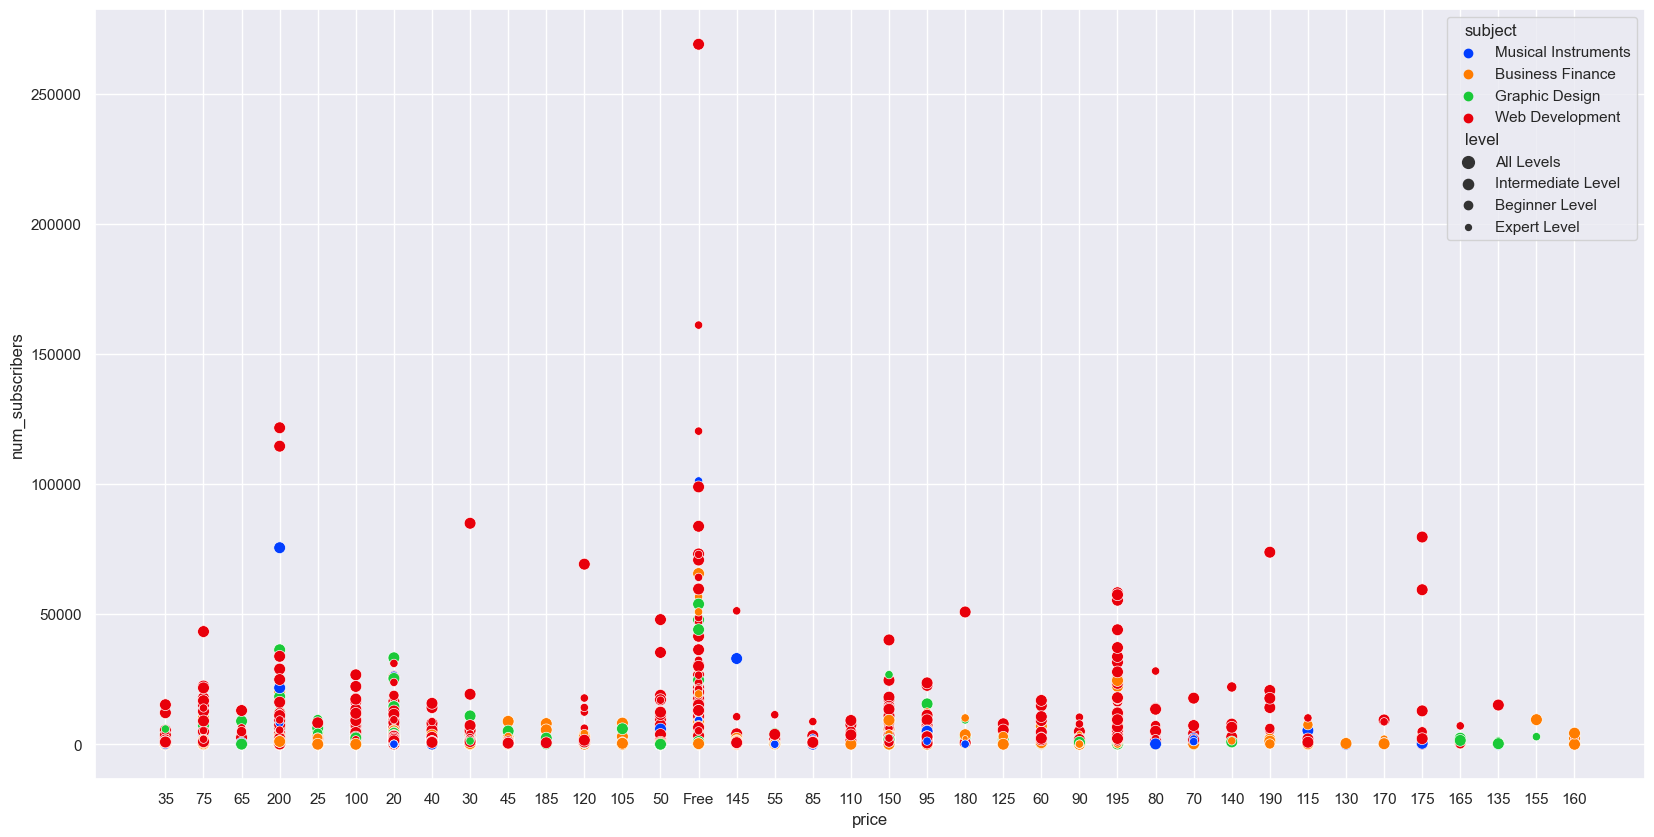

In [78]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(x='price', y='num_subscribers',hue='subject', size='level' ,data=df1, palette='bright')

([<matplotlib.patches.Wedge at 0x1e9421b1d20>,
 [Text(0.5707565692399211, 0.9403387361315471, 'Web Development'),
  Text(-1.0972352972294372, 0.07794037794255745, 'Business Finance'),
  Text(-0.044629546243523235, -1.0990942651120046, 'Musical Instruments'),
  Text(0.9572151384218976, -0.5419771017081325, 'Graphic Design')])

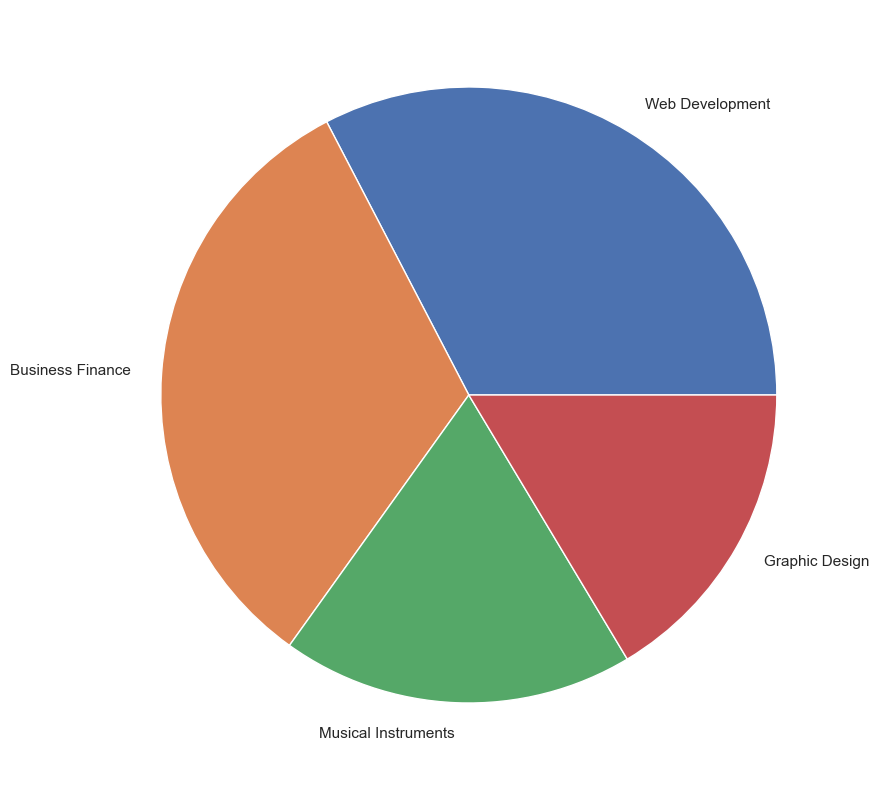

In [79]:
sub_in = df1['subject'].value_counts().to_dict().keys()
sub_val = df1['subject'].value_counts().to_dict().values()

plt.pie(x=sub_val, labels=sub_in)



In [117]:
df1.columns

Index(['index', 'course_id', 'course_title', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

In [120]:
df1['content_duration'].head

<bound method NDFrame.head of 0       1.5 hours
1          1 hour
2       1.5 hours
3          1 hour
4         37 mins
          ...    
3677      4 hours
3678      5 hours
3679    6.5 hours
3680      2 hours
3681    1.5 hours
Name: content_duration, Length: 3682, dtype: object>

In [49]:
# Drop records with questions in content duration
df1.drop( df1[df1['content_duration'].str.contains('questions')].index,inplace=True )
df1.drop( df1[ df1['content_duration'] == '0'].index,inplace=True )

In [51]:
# Test Column Binning
def split_and_transform(x):
    x = x.split(' ')

    if x[1] == 'mins':
        return round( (int(x[0])/60), 2)
    else:
        return x[0]


df1['no_hours_content'] = df1['content_duration'].apply( split_and_transform )

In [60]:
df1['no_hours_content'] = df1['no_hours_content'].astype('float64')

In [62]:
df1.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
year                                 int32
no_hours_content                   float64
dtype: object

In [63]:
df1['no_hours_content'].max()

78.5

In [65]:
df1['duration_lbl'] = pd.cut(
    x=df1['no_hours_content'],
    bins=[0, 3, 10, 20, 35, 50, 100],
    labels=['Tiny','Small','Medium','Big','Very Big','Intensive']
)

In [70]:
print(df1['duration_lbl'].value_counts())
df1.columns

duration_lbl
Tiny         2376
Small        1012
Medium        206
Big            59
Very Big       13
Intensive      11
Name: count, dtype: int64


Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'year', 'no_hours_content',
       'duration_lbl'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1e942244b20>,
 [Text(-0.4875884995240976, 0.9860311633674868, 'Tiny'),
  Text(0.2317968962370817, -1.0753000506346384, 'Small'),
  Text(1.0449062928329709, -0.34375985687403593, 'Medium'),
  Text(1.0954065376105473, -0.10042169765579796, 'Big'),
  Text(1.099508211177784, -0.03288910993976128, 'Very Big'),
  Text(1.0999514201083609, -0.010337959257055501, 'Intensive')])

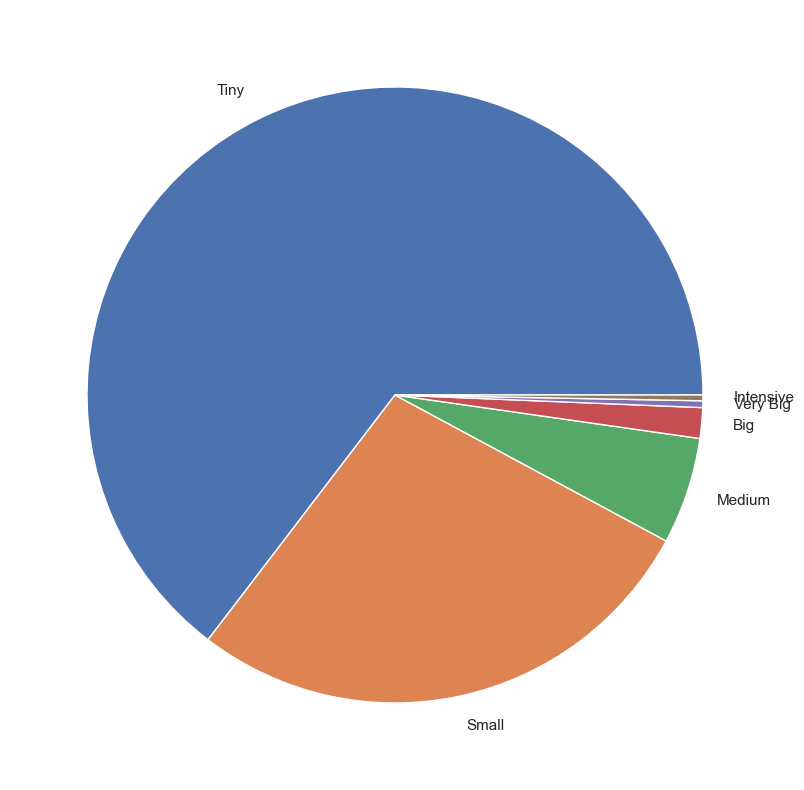

In [80]:
con_in = df1['duration_lbl'].value_counts().to_dict().keys()
con_val = df1['duration_lbl'].value_counts().to_dict().values()

plt.pie(x=con_val, labels=con_in)

<Axes: xlabel='duration_lbl', ylabel='num_subscribers'>

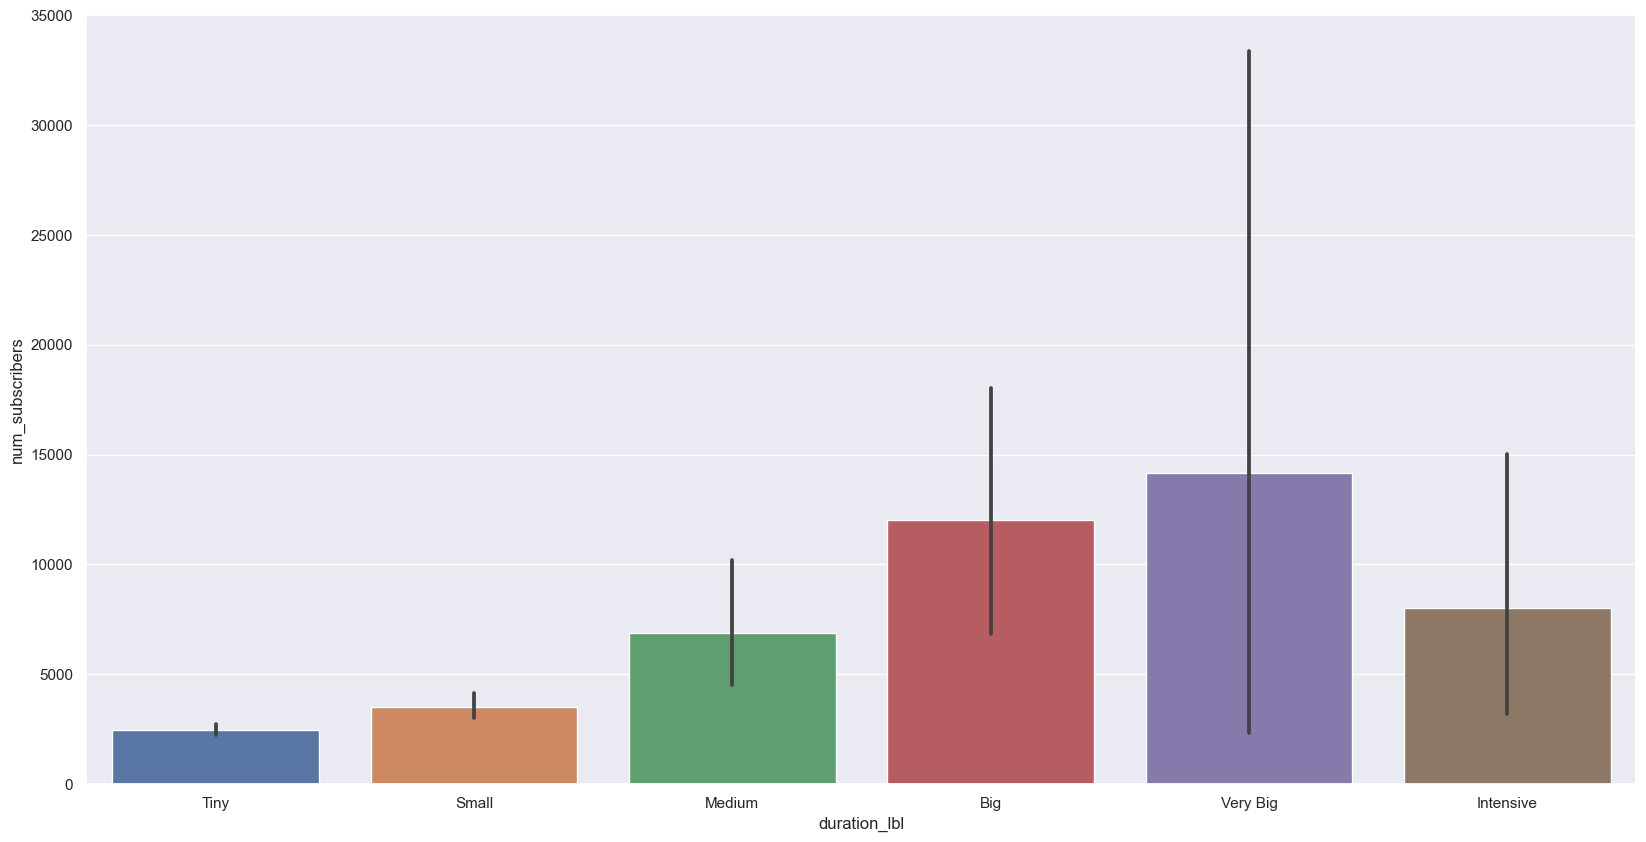

In [86]:
sns.barplot(x='duration_lbl', y='num_subscribers', data=df1)

<Axes: xlabel='duration_lbl', ylabel='num_subscribers'>

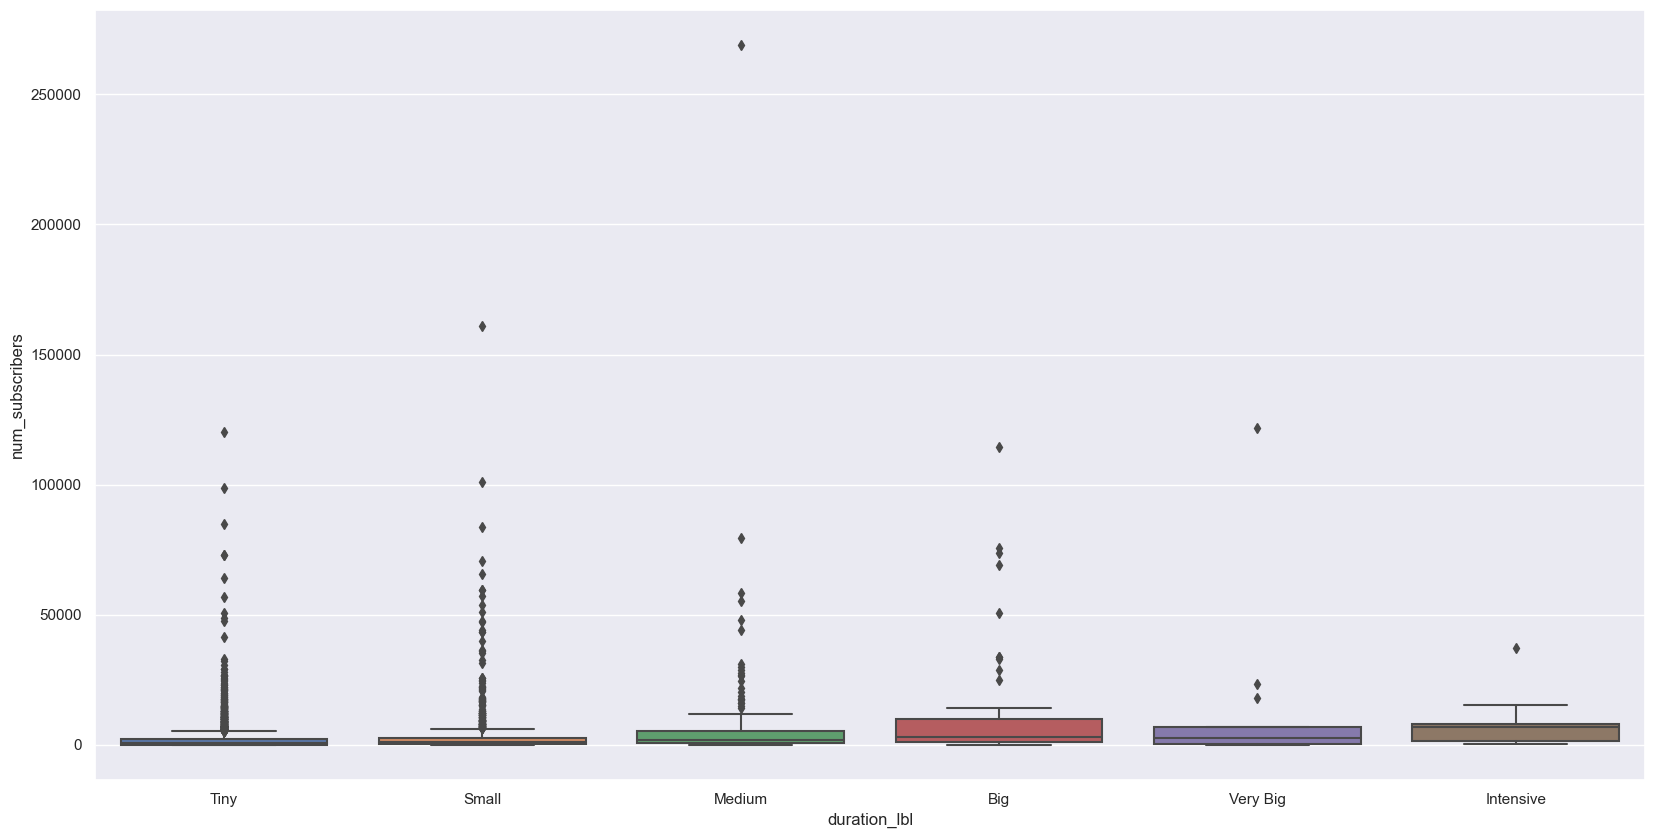

In [87]:
sns.boxplot(x='duration_lbl', y='num_subscribers', data=df1)